# Model Preparation

In [1]:
# Syncing two buckets so as to get the objects from one bucket(source) to another bucket(target)
!aws s3 sync s3://capstone-mm s3://s3accessmmec2

copy: s3://capstone-mm/events.csv to s3://s3accessmmec2/events.csv   
copy: s3://capstone-mm/appdata.csv to s3://s3accessmmec2/appdata.csv
copy: s3://capstone-mm/final_submission/non_events_init.csv to s3://s3accessmmec2/final_submission/non_events_init.csv
copy: s3://capstone-mm/non_events.csv to s3://s3accessmmec2/non_events.csv
copy: s3://capstone-mm/final_submission/events_init.csv to s3://s3accessmmec2/final_submission/events_init.csv
copy: s3://capstone-mm/final_submission/non_events_init2.csv to s3://s3accessmmec2/final_submission/non_events_init2.csv
copy: s3://capstone-mm/final_submission/events_dbscan3.csv to s3://s3accessmmec2/final_submission/events_dbscan3.csv
copy: s3://capstone-mm/final_submission/events_init2.csv to s3://s3accessmmec2/final_submission/events_init2.csv
copy: s3://capstone-mm/final_submission/appdata_init2.csv to s3://s3accessmmec2/final_submission/appdata_init2.csv
copy: s3://capstone-mm/final_submission/appdata_init.csv to s3://s3accessmmec2/final_submi

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Copying the items of my bucket into the jupyter notebook


In [4]:
!aws s3 cp s3://s3accessmmec2/final_submission/non_events_init2.csv .
!aws s3 cp s3://s3accessmmec2/final_submission/events_dbscan3.csv .

download: s3://s3accessmmec2/final_submission/non_events_init2.csv to ./non_events_init2.csv
download: s3://s3accessmmec2/final_submission/events_dbscan3.csv to ./events_dbscan3.csv


In [5]:
!aws s3 cp s3://s3accessmmec2/final_submission/appdata_init2.csv .

download: s3://s3accessmmec2/final_submission/appdata_init2.csv to ./appdata_init2.csv


In [6]:
!pip3 install awscli --user

     |████████████████████████████████| 381 kB 5.3 MB/s            
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.36
    Uninstalling prompt-toolkit-3.0.36:
      Successfully uninstalled prompt-toolkit-3.0.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.14.0 requires prompt-toolkit!=3.0.37,<3.1.0,>=3.0.30, but you have prompt-toolkit 3.0.29 which is incompatible.


In [7]:
# Reading all the csv files into notebook
app = pd.read_csv("appdata_init2.csv")
event = pd.read_csv("events_dbscan3.csv")
non_event = pd.read_csv("non_events_init2.csv")
label = pd.read_csv("label_categories.csv")

### Showing the top 5 items of the tables

In [8]:
app.head()

,event_id,app_id,is_installed,is_active,label_id,category
0,2742655,7324884708820027918,1.0,1.0,251.0,Finance
1,2120120,7324884708820027918,1.0,1.0,251.0,Finance
2,1253222,-4494216993218550286,1.0,1.0,251.0,Finance
3,3105831,6058196446775239644,1.0,1.0,406.0,unknown
4,3104681,6058196446775239644,1.0,1.0,406.0,unknown


In [9]:
event.head()

,device_id,event_id,event_time,latitude,longitude,gender,age,group_train,age_group,cluster_id
0,-7548291590301750000,2279193,2016-05-03 03:10:01,116.79,33.98,M,33,M32+,32+,0
1,-7548291590301750000,1121009,2016-05-03 15:37:40,116.79,33.98,M,33,M32+,32+,0
2,-7548291590301750000,1121005,2016-05-03 15:33:51,116.79,33.98,M,33,M32+,32+,0
3,-7548291590301750000,1113814,2016-05-01 10:27:52,116.79,33.98,M,33,M32+,32+,0
4,-7548291590301750000,1113205,2016-05-04 09:10:43,116.79,33.98,M,33,M32+,32+,0


In [10]:
non_event.head()

,device_id,phone_brand,device_model,gender,age,group_train,age_group
0,-7548291590301750000,Huawei,3C,M,33,M32+,32+
1,6943568600617760000,Xiaomi,xnote,M,37,M32+,32+
2,5441349705980020000,OPPO,R7s,M,40,M32+,32+
3,-5393876656119450000,Xiaomi,MI 4,M,33,M32+,32+
4,4543988487649880000,samsung,Galaxy S4,M,53,M32+,32+


## Data Preparation 

In [11]:
# Merging the tables event and non-event for Scenario 1 (all information)
df = pd.merge(event,non_event,on="device_id",how="left")

In [12]:
df.head()

,device_id,event_id,event_time,latitude,longitude,gender_x,age_x,group_train_x,age_group_x,cluster_id,phone_brand,device_model,gender_y,age_y,group_train_y,age_group_y
0,-7548291590301750000,2279193,2016-05-03 03:10:01,116.79,33.98,M,33,M32+,32+,0,Huawei,3C,M,33,M32+,32+
1,-7548291590301750000,1121009,2016-05-03 15:37:40,116.79,33.98,M,33,M32+,32+,0,Huawei,3C,M,33,M32+,32+
2,-7548291590301750000,1121005,2016-05-03 15:33:51,116.79,33.98,M,33,M32+,32+,0,Huawei,3C,M,33,M32+,32+
3,-7548291590301750000,1113814,2016-05-01 10:27:52,116.79,33.98,M,33,M32+,32+,0,Huawei,3C,M,33,M32+,32+
4,-7548291590301750000,1113205,2016-05-04 09:10:43,116.79,33.98,M,33,M32+,32+,0,Huawei,3C,M,33,M32+,32+


In [13]:
#Loading the train_test_csv
train_test=pd.read_csv("train_test_split.csv",header=0)

In [14]:
train_test.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [15]:
train_test["train_test_flag"].value_counts()

train    58549
test     16096
Name: train_test_flag, dtype: int64

In [16]:
# Merging the tables df and train_test 
df = pd.merge(df,train_test,on="device_id",how="left")

In [17]:
df.head()

,device_id,event_id,event_time,latitude,longitude,gender_x,age_x,group_train_x,age_group_x,cluster_id,phone_brand,device_model,gender_y,age_y,group_train_y,age_group_y,gender,age,group,train_test_flag
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,52,M32+,32+,0.0,Huawei,Ascend P8,M,52,M32+,32+,M,52,M32+,train
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,36,M32+,32+,0.0,HTC,One,M,36,M32+,32+,M,36,M32+,test
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,28,M25-32,25-32,0.0,vivo,X6 D,M,28,M25-32,25-32,M,28,M25-32,test
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,19,F0-24,0-24,0.0,OPPO,R7,F,19,F0-24,0-24,F,19,F0-24,test
4,-6242501228649110000,2958939,2016-05-01 21:59:40,111.21,27.85,M,20,M0-24,0-24,0.0,OPPO,R3,M,20,M0-24,0-24,M,20,M0-24,train


In [18]:
df.columns

Index(['device_id', 'event_id', 'event_time', 'latitude', 'longitude',
       'gender_x', 'age_x', 'group_train_x', 'age_group_x', 'cluster_id',
       'phone_brand', 'device_model', 'gender_y', 'age_y', 'group_train_y',
       'age_group_y', 'gender', 'age', 'group', 'train_test_flag'],
      dtype='object')

In [19]:
# Dropping irrelevant columns
df=df.drop(columns=["gender_y","age_y","age_x","age_group_y","group_train_y","group_train_x","gender","age","group"],axis=1)

In [20]:
# Renaming columns gender, age and group_train
df.rename(columns={"gender_x":"gender","age_group_x":"age_group"},inplace=True)

In [21]:
df.head()

,device_id,event_id,event_time,latitude,longitude,gender,age_group,cluster_id,phone_brand,device_model,train_test_flag
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,32+,0.0,Huawei,Ascend P8,train
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,32+,0.0,HTC,One,test
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,25-32,0.0,vivo,X6 D,test
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,0-24,0.0,OPPO,R7,test
4,-6242501228649110000,2958939,2016-05-01 21:59:40,111.21,27.85,M,0-24,0.0,OPPO,R3,train


In [22]:
df.count()

device_id          862364
event_id           862364
event_time         862364
latitude           862364
longitude          862364
gender             862364
age_group          862364
cluster_id         862364
phone_brand        862364
device_model       862364
train_test_flag    862364
dtype: int64

In [23]:
# Data cleaning part already took care of null values
df.isnull().sum()

device_id          0
event_id           0
event_time         0
latitude           0
longitude          0
gender             0
age_group          0
cluster_id         0
phone_brand        0
device_model       0
train_test_flag    0
dtype: int64

In [24]:
# Merging app data and labels data
app_label = pd.merge(app,label,on=("label_id"))
app_label.head()

,event_id,app_id,is_installed,is_active,label_id,category_x,category_y
0,2960967,8557198901083791098,1.0,1.0,548.0,Industry tag,Industry tag
1,2960967,5300107820801348133,1.0,1.0,548.0,Industry tag,Industry tag
2,2960967,4348659952760821294,1.0,1.0,548.0,Industry tag,Industry tag
3,2960967,-6793861127573349654,1.0,1.0,548.0,Industry tag,Industry tag
4,2960969,-5472633337921616096,1.0,1.0,548.0,Industry tag,Industry tag


In [25]:
# Removing extra category column
app_label = app_label.drop(columns=["category_y"],axis=1)
app_label.rename(columns={"category_x":"category"},inplace=True)

In [26]:
app_label.count()

event_id        18916656
app_id          18916656
is_installed    18916656
is_active       18916656
label_id        18916656
category        18916656
dtype: int64

In [27]:
# Dropping any duplicates
app_label = app_label.drop_duplicates()

In [28]:
app_label.count()

event_id        18771672
app_id          18771672
is_installed    18771672
is_active       18771672
label_id        18771672
category        18771672
dtype: int64

In [29]:
app_label[app_label.duplicated(["app_id"])]

,event_id,app_id,is_installed,is_active,label_id,category
17,2960977,5927333115845830913,1.0,1.0,548.0,Industry tag
19,2960977,-5472633337921616096,1.0,1.0,548.0,Industry tag
20,2960977,8693964245073640147,1.0,1.0,548.0,Industry tag
24,2960977,4348659952760821294,1.0,1.0,548.0,Industry tag
29,2960978,5927333115845830913,1.0,1.0,548.0,Industry tag
...,...,...,...,...,...,...
18916650,190501,680824073026955030,1.0,1.0,944.0,Southeast Asia (Travel)
18916651,452329,680824073026955030,1.0,1.0,944.0,Southeast Asia (Travel)
18916652,548328,680824073026955030,1.0,1.0,944.0,Southeast Asia (Travel)
18916654,264311,-7995837913973148847,1.0,1.0,762.0,Trust


In [30]:
df1 = pd.DataFrame(app_label["category"].value_counts())

In [31]:
df1.head(20)

,category
Industry tag,2609857
Property Industry 2.0,1804481
Property Industry 1.0,1619959
unknown,1226010
Services 1,820260
Custom label,619480
And the Church,564108
Relatives 1,506279
Internet banking,482116
IM,459330


In [32]:
# Removing the digits from categories for feature engineering
import re
def digits_elimination(string):
    pattern = r'[0-9]'
    new_string = re.sub(pattern, '', string)
    pattern=r'[^\x00-\x7F]+'
    new_string = re.sub(pattern, '', new_string)
    pattern ="\."
    new_string = re.sub(pattern, '', new_string)
    return new_string

In [33]:
app_label["category"]=app_label["category"].apply(digits_elimination)
app_label["category"].value_counts()

Property Industry     3424440
Industry tag          2609857
unknown               1226010
Services               820260
Custom label           619480
                       ...   
game-Rowing                 1
Trust                       1
Trust funds                 1
reality show                1
Educational games           1
Name: category, Length: 428, dtype: int64

In [34]:
df1=pd.DataFrame(app_label.groupby(["app_id"])["category"].apply(pd.Series.mode)).reset_index()

In [35]:
df1.head()

,app_id,level_1,category
0,-9217104312935103667,0,strategy game
1,-9216716044975227433,0,free
2,-9216716044975227433,1,Industry tag
3,-9216716044975227433,2,Property Industry
4,-9216716044975227433,3,video


In [36]:
df1.drop_duplicates(subset=["app_id"],keep="first",inplace=True)

In [37]:
df1.drop(columns=["level_1"],inplace=True)

In [38]:
df1.head()

,app_id,category
0,-9217104312935103667,strategy game
1,-9216716044975227433,free
5,-9216547119863430601,Property Industry
6,-9216245512488580977,Industry tag
10,-9215674982339481470,Industry tag


In [39]:
# Merging df1 with app table
app_label_data = pd.merge(app, df1, on=("app_id"), how="inner")

In [40]:
app_label_data.head()

,event_id,app_id,is_installed,is_active,label_id,category_x,category_y
0,2960967,8557198901083791098,1.0,1.0,548.0,Industry tag,IM
1,2960967,8557198901083791098,1.0,1.0,204.0,sports and gym,IM
2,2960967,8557198901083791098,1.0,1.0,172.0,IM,IM
3,2960967,8557198901083791098,1.0,1.0,223.0,convenience services,IM
4,2960967,8557198901083791098,1.0,1.0,206.0,Medical,IM


In [41]:
# Keeping only the data of apps that are active
app_label_data=app_label_data[app_label_data["is_active"]==1]

In [42]:
# Merging df dataframe with app_label_data based on event_id
df1 = pd.merge(df, app_label_data, on=("event_id"), how="inner")
df1.head()

,device_id,event_id,event_time,latitude,longitude,gender,age_group,cluster_id,phone_brand,device_model,train_test_flag,app_id,is_installed,is_active,label_id,category_x,category_y
0,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,25-32,1.0,samsung,Galaxy Mega 5.8,train,4348659952760821294,1.0,1.0,548.0,Industry tag,Pay
1,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,25-32,1.0,samsung,Galaxy Mega 5.8,train,4348659952760821294,1.0,1.0,262.0,Pay,Pay
2,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,25-32,1.0,samsung,Galaxy Mega 5.8,train,4348659952760821294,1.0,1.0,251.0,Finance,Pay
3,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,25-32,1.0,samsung,Galaxy Mega 5.8,train,4348659952760821294,1.0,1.0,1008.0,Pay,Pay
4,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,25-32,1.0,samsung,Galaxy Mega 5.8,train,4348659952760821294,1.0,1.0,786.0,Low risk,Pay


In [43]:
df1.isnull().sum()

device_id          0
event_id           0
event_time         0
latitude           0
longitude          0
gender             0
age_group          0
cluster_id         0
phone_brand        0
device_model       0
train_test_flag    0
app_id             0
is_installed       0
is_active          0
label_id           0
category_x         0
category_y         0
dtype: int64

In [44]:
# Dropping irrelevant columns
df1.drop(columns=["app_id","age_group","is_installed","is_active","device_model","category_y"],inplace=True)

In [45]:
df1.rename(columns={"category_x":"category"},inplace=True)

In [46]:
df1.train_test_flag.value_counts()

train    1960174
test      668401
Name: train_test_flag, dtype: int64

## Feature Engineering

In [47]:
df.head()

,device_id,event_id,event_time,latitude,longitude,gender,age_group,cluster_id,phone_brand,device_model,train_test_flag
0,4676982795249940000,2958924,2016-05-01 22:03:46,113.24,22.85,M,32+,0.0,Huawei,Ascend P8,train
1,4782582047729160000,2958931,2016-05-01 22:24:09,114.47,38.03,M,32+,0.0,HTC,One,test
2,2181284491650730000,2958933,2016-05-01 22:24:44,125.66,43.02,M,25-32,0.0,vivo,X6 D,test
3,4221762657972680000,2958935,2016-05-01 22:40:47,115.19,24.07,F,0-24,0.0,OPPO,R7,test
4,-6242501228649110000,2958939,2016-05-01 21:59:40,111.21,27.85,M,0-24,0.0,OPPO,R3,train


In [48]:
df.count()

device_id          862364
event_id           862364
event_time         862364
latitude           862364
longitude          862364
gender             862364
age_group          862364
cluster_id         862364
phone_brand        862364
device_model       862364
train_test_flag    862364
dtype: int64

In [49]:
df.columns

Index(['device_id', 'event_id', 'event_time', 'latitude', 'longitude',
       'gender', 'age_group', 'cluster_id', 'phone_brand', 'device_model',
       'train_test_flag'],
      dtype='object')

In [50]:
df1.head()

,device_id,event_id,event_time,latitude,longitude,gender,cluster_id,phone_brand,train_test_flag,label_id,category
0,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,548.0,Industry tag
1,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,262.0,Pay
2,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,251.0,Finance
3,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,1008.0,Pay
4,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,786.0,Low risk


In [51]:
df1["age_group"] = df["age_group"]

In [52]:
df1.count()

device_id          2628575
event_id           2628575
event_time         2628575
latitude           2628575
longitude          2628575
gender             2628575
cluster_id         2628575
phone_brand        2628575
train_test_flag    2628575
label_id           2628575
category           2628575
age_group           862364
dtype: int64

### A feature called "total_events" can be added here based on the total number of events for each device id

In [53]:
event.groupby(["device_id"])["event_id"].count()

device_id
-9222956879900150000     52
-9221026417907250000    132
-9220061629197650000     39
-9218769147970100000     17
-9215352913819630000     18
                       ... 
 9215085115859650000     17
 9216925254504440000     73
 9219164468944550000    407
 9219842210460030000      4
 9220914901466450000      3
Name: event_id, Length: 11949, dtype: int64

In [54]:
df=pd.DataFrame(event.groupby(["device_id"])["event_id"].count())
df.rename(columns={"event_id":"total_events"},inplace=True)
df.head()

,total_events
device_id,
-9222956879900150000,52
-9221026417907250000,132
-9220061629197650000,39
-9218769147970100000,17
-9215352913819630000,18


In [55]:
# Finally merging the dataframes df and df1
final_df = pd.merge(df1,df,on=("device_id"),how="inner")

In [56]:
final_df.count()

device_id          2628575
event_id           2628575
event_time         2628575
latitude           2628575
longitude          2628575
gender             2628575
cluster_id         2628575
phone_brand        2628575
train_test_flag    2628575
label_id           2628575
category           2628575
age_group           862364
total_events       2628575
dtype: int64

In [57]:
final_df.head(20)

,device_id,event_id,event_time,latitude,longitude,gender,cluster_id,phone_brand,train_test_flag,label_id,category,age_group,total_events
0,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,548.0,Industry tag,32+,303
1,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,262.0,Pay,32+,303
2,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,251.0,Finance,25-32,303
3,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,1008.0,Pay,0-24,303
4,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,786.0,Low risk,0-24,303
5,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,780.0,Moderate profitability,32+,303
6,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,773.0,High Flow,32+,303
7,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,759.0,Third party payment,32+,303
8,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,756.0,Internet banking,32+,303
9,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,730.0,And the Church,0-24,303


In [58]:
df1.groupby(["device_id","longitude","latitude"]).size()

device_id             longitude  latitude
-9222956879900150000  23.19      113.24       867
-9221026417907250000  30.87      114.36       272
                                 114.37        62
-9220061629197650000  46.60      124.91         9
                      46.61      124.90         9
                                             ... 
 9219164468944550000  30.27      120.17      2409
                      30.28      120.16        72
 9219842210460030000  26.52      101.72        41
 9220914901466450000  32.59      118.94         5
                      32.67      118.99         5
Length: 16624, dtype: int64

In [59]:
new_df=pd.DataFrame(df.groupby("device_id").size())
new_df.head(20)

,0
device_id,
-9222956879900150000,1
-9221026417907250000,1
-9220061629197650000,1
-9218769147970100000,1
-9215352913819630000,1
-9212424538588390000,1
-9206202041936920000,1
-9205645091197540000,1
-9205293319808660000,1


In [60]:
dff=pd.DataFrame(df1.groupby(["device_id","longitude","latitude"]).size()).reset_index()
dff.head(10)

,device_id,longitude,latitude,0
0,-9222956879900150000,23.19,113.24,867
1,-9221026417907250000,30.87,114.36,272
2,-9221026417907250000,30.87,114.37,62
3,-9220061629197650000,46.60,124.91,9
4,-9220061629197650000,46.61,124.90,9
5,-9220061629197650000,46.63,124.88,9
6,-9218769147970100000,28.60,112.33,4
7,-9212424538588390000,22.95,113.47,38
8,-9206202041936920000,34.70,113.70,31
9,-9206202041936920000,34.70,113.71,132


In [61]:
final_df[final_df['device_id']==-9222956879900150000]

,device_id,event_id,event_time,latitude,longitude,gender,cluster_id,phone_brand,train_test_flag,label_id,category,age_group,total_events
2558840,-9222956879900150000,205471,2016-05-06 15:36:46,113.24,23.19,M,1.0,samsung,train,548.0,Industry tag,NaN,52
2558841,-9222956879900150000,205471,2016-05-06 15:36:46,113.24,23.19,M,1.0,samsung,train,262.0,Pay,NaN,52
2558842,-9222956879900150000,205471,2016-05-06 15:36:46,113.24,23.19,M,1.0,samsung,train,251.0,Finance,NaN,52
2558843,-9222956879900150000,205471,2016-05-06 15:36:46,113.24,23.19,M,1.0,samsung,train,1008.0,Pay,NaN,52
2558844,-9222956879900150000,205471,2016-05-06 15:36:46,113.24,23.19,M,1.0,samsung,train,786.0,Low risk,NaN,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559702,-9222956879900150000,450249,2016-05-07 11:55:51,113.24,23.19,M,1.0,samsung,train,960.0,P2P,NaN,52
2559703,-9222956879900150000,450249,2016-05-07 11:55:51,113.24,23.19,M,1.0,samsung,train,959.0,financial,NaN,52
2559704,-9222956879900150000,450249,2016-05-07 11:55:51,113.24,23.19,M,1.0,samsung,train,1007.0,P2P net loan,NaN,52
2559705,-9222956879900150000,450249,2016-05-07 11:55:51,113.24,23.19,M,1.0,samsung,train,548.0,Industry tag,NaN,52


### Adding a feature latitude median and longitude median

In [62]:
# Taking the median of the latitudes and longitudes corresponding to the different device ids
dff = final_df.groupby(["device_id"]).aggregate({"longitude":['median'],"latitude":['median']}).droplevel(1,axis=1).reset_index()

In [63]:
# Renaming median values of long and lat and removing the irrelevant columns 
dff.rename(columns={"longitude":"longitude_median","latitude":"latitude_median"},inplace=True)
final_df=pd.merge(final_df,dff,on=("device_id"),how="left")

In [64]:
final_df.head()

,device_id,event_id,event_time,latitude,longitude,gender,cluster_id,phone_brand,train_test_flag,label_id,category,age_group,total_events,longitude_median,latitude_median
0,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,548.0,Industry tag,32+,303,30.65,104.08
1,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,262.0,Pay,32+,303,30.65,104.08
2,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,251.0,Finance,25-32,303,30.65,104.08
3,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,1008.0,Pay,0-24,303,30.65,104.08
4,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,786.0,Low risk,0-24,303,30.65,104.08


### Adding the day of the week

In [65]:
import datetime as dt
final_df["event_time"] = pd.to_datetime(final_df["event_time"])
final_df.dtypes

device_id                    int64
event_id                     int64
event_time          datetime64[ns]
latitude                   float64
longitude                  float64
gender                      object
cluster_id                 float64
phone_brand                 object
train_test_flag             object
label_id                   float64
category                    object
age_group                   object
total_events                 int64
longitude_median           float64
latitude_median            float64
dtype: object

In [66]:
final_df["week_day"]=final_df["event_time"].dt.dayofweek
final_df["week_day"].value_counts()

1    402895
3    388843
4    381691
2    381201
0    364967
5    356250
6    352728
Name: week_day, dtype: int64

### Adding a feature called hour from the event_time

In [67]:
final_df["hour"]=final_df["event_time"].dt.hour
final_df["event_time"].dt.week.value_counts()

/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


18    2275209
17     353366
Name: event_time, dtype: int64

In [68]:
final_df.dtypes

device_id                    int64
event_id                     int64
event_time          datetime64[ns]
latitude                   float64
longitude                  float64
gender                      object
cluster_id                 float64
phone_brand                 object
train_test_flag             object
label_id                   float64
category                    object
age_group                   object
total_events                 int64
longitude_median           float64
latitude_median            float64
week_day                     int64
hour                         int64
dtype: object

In [69]:
final_df["hour"].value_counts().sort_values()

4      34627
3      36521
2      44952
5      54060
1      62110
6      91019
0      98684
23    115399
14    116945
15    119479
7     122333
16    124162
17    124630
13    125876
22    127116
20    128312
18    128716
21    135621
19    136854
8     137547
11    137869
12    138367
9     139581
10    147795
Name: hour, dtype: int64

In [70]:
final_df.head()

,device_id,event_id,event_time,latitude,longitude,gender,cluster_id,phone_brand,train_test_flag,label_id,category,age_group,total_events,longitude_median,latitude_median,week_day,hour
0,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,548.0,Industry tag,32+,303,30.65,104.08,1,23
1,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,262.0,Pay,32+,303,30.65,104.08,1,23
2,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,251.0,Finance,25-32,303,30.65,104.08,1,23
3,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,1008.0,Pay,0-24,303,30.65,104.08,1,23
4,-2582852392726770000,2961008,2016-05-03 23:09:55,104.07,30.65,F,1.0,samsung,train,786.0,Low risk,0-24,303,30.65,104.08,1,23


In [71]:
#Dropping irrelevant columns
final_df.drop(columns=["event_id","event_time","latitude","longitude"],inplace=True)
final_df.head()

,device_id,gender,cluster_id,phone_brand,train_test_flag,label_id,category,age_group,total_events,longitude_median,latitude_median,week_day,hour
0,-2582852392726770000,F,1.0,samsung,train,548.0,Industry tag,32+,303,30.65,104.08,1,23
1,-2582852392726770000,F,1.0,samsung,train,262.0,Pay,32+,303,30.65,104.08,1,23
2,-2582852392726770000,F,1.0,samsung,train,251.0,Finance,25-32,303,30.65,104.08,1,23
3,-2582852392726770000,F,1.0,samsung,train,1008.0,Pay,0-24,303,30.65,104.08,1,23
4,-2582852392726770000,F,1.0,samsung,train,786.0,Low risk,0-24,303,30.65,104.08,1,23


In [72]:
final_df.count()

device_id           2628575
gender              2628575
cluster_id          2628575
phone_brand         2628575
train_test_flag     2628575
label_id            2628575
category            2628575
age_group            862364
total_events        2628575
longitude_median    2628575
latitude_median     2628575
week_day            2628575
hour                2628575
dtype: int64

### Reducing the number of categories to final categories

In [73]:
final_df['category']

0                      Industry tag
1                               Pay
2                           Finance
3                               Pay
4                          Low risk
                     ...           
2628570    Personal Effectiveness 1
2628571                     unknown
2628572                     unknown
2628573                Industry tag
2628574       Property Industry 2.0
Name: category, Length: 2628575, dtype: object

In [74]:
# Finding differences or “diff” between contents of files or other hashable Python objects, which is category in this case
import difflib

In [75]:
def final_category(word):
    seq=[]
    Categories_of_Apps=["Industry","property","finance","games","health","church","Entertainment","Custom label","tencent","Buy","Education"]
    for a in Categories_of_Apps:
        temp = difflib.SequenceMatcher(None,a,word)
        d = temp.ratio()*100
        seq.append(d)
    word1 = Categories_of_Apps[seq.index(max(seq))]
    return word1

In [77]:
final_df["final_category"]=final_df["category"].apply(final_category)

In [78]:
final_df.head(15)

,device_id,gender,cluster_id,phone_brand,train_test_flag,label_id,category,age_group,total_events,longitude_median,latitude_median,week_day,hour,final_category
0,-2582852392726770000,F,1.0,samsung,train,548.0,Industry tag,32+,303,30.65,104.08,1,23,Industry
1,-2582852392726770000,F,1.0,samsung,train,262.0,Pay,32+,303,30.65,104.08,1,23,Buy
2,-2582852392726770000,F,1.0,samsung,train,251.0,Finance,25-32,303,30.65,104.08,1,23,finance
3,-2582852392726770000,F,1.0,samsung,train,1008.0,Pay,0-24,303,30.65,104.08,1,23,Buy
4,-2582852392726770000,F,1.0,samsung,train,786.0,Low risk,0-24,303,30.65,104.08,1,23,Entertainment
5,-2582852392726770000,F,1.0,samsung,train,780.0,Moderate profitability,32+,303,30.65,104.08,1,23,Entertainment
6,-2582852392726770000,F,1.0,samsung,train,773.0,High Flow,32+,303,30.65,104.08,1,23,health
7,-2582852392726770000,F,1.0,samsung,train,759.0,Third party payment,32+,303,30.65,104.08,1,23,Entertainment
8,-2582852392726770000,F,1.0,samsung,train,756.0,Internet banking,32+,303,30.65,104.08,1,23,Entertainment
9,-2582852392726770000,F,1.0,samsung,train,730.0,And the Church,0-24,303,30.65,104.08,1,23,church


In [81]:
final_df.drop(columns = "category", inplace= True)

In [82]:
final_df.columns

Index(['device_id', 'gender', 'cluster_id', 'phone_brand', 'train_test_flag',
       'label_id', 'age_group', 'total_events', 'longitude_median',
       'latitude_median', 'week_day', 'hour', 'final_category'],
      dtype='object')

In [83]:
final_df["cluster_id"].value_counts()

 1.0    2401074
 0.0     213840
-1.0      12765
 2.0        896
Name: cluster_id, dtype: int64

In [84]:
#Saving the final_df into s3 bucket
final_df.to_csv(r'final_df.csv', index = False)
!aws s3 cp final_df.csv s3://s3accessec2/final_submission/final_df.csv 

upload: ./final_df.csv to s3://s3accessec2/final_submission/final_df.csv


# Model Building

## Scenario 1( all information ) will be implemented using final_df dataset 

In [153]:
final_df = pd.read_csv("final_df.csv")
final_df.head()

,device_id,gender,cluster_id,phone_brand,train_test_flag,label_id,age_group,total_events,longitude_median,latitude_median,week_day,hour,final_category
0,-2582852392726770000,F,1.0,samsung,train,548.0,32+,303,30.65,104.08,1,23,Industry
1,-2582852392726770000,F,1.0,samsung,train,262.0,32+,303,30.65,104.08,1,23,Buy
2,-2582852392726770000,F,1.0,samsung,train,251.0,25-32,303,30.65,104.08,1,23,finance
3,-2582852392726770000,F,1.0,samsung,train,1008.0,0-24,303,30.65,104.08,1,23,Buy
4,-2582852392726770000,F,1.0,samsung,train,786.0,0-24,303,30.65,104.08,1,23,Entertainment


In [158]:
final_df.isnull()

,device_id,gender,cluster_id,phone_brand,train_test_flag,label_id,age_group,total_events,longitude_median,latitude_median,week_day,hour,final_category
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628570,False,False,False,False,False,False,True,False,False,False,False,False,False
2628571,False,False,False,False,False,False,True,False,False,False,False,False,False
2628572,False,False,False,False,False,False,True,False,False,False,False,False,False
2628573,False,False,False,False,False,False,True,False,False,False,False,False,False


### This shows that age column has null values. So we will remove all the rows where age_group column is null

In [173]:
final_df = final_df[~final_df['age_group'].isnull()]

In [174]:
final_df.count()

device_id           862364
gender              862364
cluster_id          862364
phone_brand         862364
train_test_flag     862364
label_id            862364
age_group           862364
total_events        862364
longitude_median    862364
latitude_median     862364
week_day            862364
hour                862364
final_category      862364
dtype: int64

In [85]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [86]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [20]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from mlxtend.classifier import StackingCVClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [176]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(final_df.final_category)

In [177]:
integer_encoded

array([4, 0, 6, ..., 4, 4, 4])

In [178]:
final_df["category_code"]=integer_encoded

In [179]:
brand_encoded = label_encoder.fit_transform(final_df.phone_brand)
final_df["phone_brands_code"]=brand_encoded

In [180]:
brand_encoded

array([35, 35, 35, ...,  4,  4,  4])

In [181]:
final_df.head()

,device_id,gender,cluster_id,phone_brand,train_test_flag,label_id,age_group,total_events,longitude_median,latitude_median,week_day,hour,final_category,category_code,phone_brands_code
0,-2582852392726770000,F,1.0,samsung,train,548.0,32+,303,30.65,104.08,1,23,Industry,4,35
1,-2582852392726770000,F,1.0,samsung,train,262.0,32+,303,30.65,104.08,1,23,Buy,0,35
2,-2582852392726770000,F,1.0,samsung,train,251.0,25-32,303,30.65,104.08,1,23,finance,6,35
3,-2582852392726770000,F,1.0,samsung,train,1008.0,0-24,303,30.65,104.08,1,23,Buy,0,35
4,-2582852392726770000,F,1.0,samsung,train,786.0,0-24,303,30.65,104.08,1,23,Entertainment,3,35


In [182]:
final_df["train_test_flag"].value_counts()

train    643233
test     219131
Name: train_test_flag, dtype: int64

In [217]:
final_df.isnull().sum()

device_id               0
gender                  0
cluster_id              0
phone_brand             0
train_test_flag         0
                       ..
phone_brands_code_34    0
phone_brands_code_35    0
phone_brands_code_36    0
phone_brands_code_37    0
phone_brands_code_38    0
Length: 89, dtype: int64

## Predicting Gender for Scenario 1

In [183]:
#Converting categorial columns to dummy variables
categorical_columns = ['week_day','hour','age_group','category_code','phone_brands_code']
pd.get_dummies(data=final_df, columns=categorical_columns, drop_first=True).columns

Index(['device_id', 'gender', 'cluster_id', 'phone_brand', 'train_test_flag',
       'label_id', 'total_events', 'longitude_median', 'latitude_median',
       'final_category', 'week_day_1', 'week_day_2', 'week_day_3',
       'week_day_4', 'week_day_5', 'week_day_6', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'age_group_25-32', 'age_group_32+', 'category_code_1',
       'category_code_2', 'category_code_3', 'category_code_4',
       'category_code_5', 'category_code_6', 'category_code_7',
       'category_code_8', 'category_code_9', 'category_code_10',
       'phone_brands_code_1', 'phone_brands_code_2', 'phone_brands_code_3',
       'phone_brands_code_4', 'phone_brands_code_5', 'phone_brands_code_6',
       'phone_brands_code_7', 'phone_brands_code_8', 'phone_

In [184]:
final_df=pd.get_dummies(data=final_df, columns=categorical_columns, drop_first=True)

In [185]:
#Test data prep
final_df["gender"].value_counts()
final_df["gender"]=final_df["gender"].apply(lambda x : 0 if x=='F' else 1)
final_df["gender"].value_counts()

1    648530
0    213834
Name: gender, dtype: int64

In [186]:
df_train=final_df[final_df["train_test_flag"]=="train"]
df_train["gender"].value_counts()

1    482523
0    160710
Name: gender, dtype: int64

In [187]:
df_test=final_df[final_df["train_test_flag"]=="test"]
df_test["gender"].value_counts()

1    166007
0     53124
Name: gender, dtype: int64

In [188]:
y_train=df_train["gender"]
y_test=df_test["gender"]

In [189]:
y_train.value_counts()

1    482523
0    160710
Name: gender, dtype: int64

In [190]:
x_train=df_train.drop(columns=["gender","final_category","train_test_flag","device_id","phone_brand"])
x_test=df_test.drop(columns=["gender","final_category","train_test_flag","device_id","phone_brand"])

In [191]:
x_train.columns

Index(['cluster_id', 'label_id', 'total_events', 'longitude_median',
       'latitude_median', 'week_day_1', 'week_day_2', 'week_day_3',
       'week_day_4', 'week_day_5', 'week_day_6', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'age_group_25-32', 'age_group_32+', 'category_code_1',
       'category_code_2', 'category_code_3', 'category_code_4',
       'category_code_5', 'category_code_6', 'category_code_7',
       'category_code_8', 'category_code_9', 'category_code_10',
       'phone_brands_code_1', 'phone_brands_code_2', 'phone_brands_code_3',
       'phone_brands_code_4', 'phone_brands_code_5', 'phone_brands_code_6',
       'phone_brands_code_7', 'phone_brands_code_8', 'phone_brands_code_9',
       'phone_brands_code_10', 'phone_brands_code_11', 'phone_bran

In [192]:
x_train.head()

,cluster_id,label_id,total_events,longitude_median,latitude_median,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,...,phone_brands_code_29,phone_brands_code_30,phone_brands_code_31,phone_brands_code_32,phone_brands_code_33,phone_brands_code_34,phone_brands_code_35,phone_brands_code_36,phone_brands_code_37,phone_brands_code_38
0,1.0,548.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,262.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,251.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1008.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,786.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [193]:
from sklearn.preprocessing import StandardScaler
x_train["total_events"]=StandardScaler().fit_transform(x_train[["total_events"]])

In [194]:
x_train["longitude_median"]=StandardScaler().fit_transform(x_train[["longitude_median"]])
x_train["latitude_median"]=StandardScaler().fit_transform(x_train[["latitude_median"]])

In [195]:
x_test["total_events"]=StandardScaler().fit_transform(x_test[["total_events"]])
x_test["longitude_median"]=StandardScaler().fit_transform(x_test[["longitude_median"]])
x_test["latitude_median"]=StandardScaler().fit_transform(x_test[["latitude_median"]])

In [196]:
x_train

,cluster_id,label_id,total_events,longitude_median,latitude_median,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,...,phone_brands_code_29,phone_brands_code_30,phone_brands_code_31,phone_brands_code_32,phone_brands_code_33,phone_brands_code_34,phone_brands_code_35,phone_brands_code_36,phone_brands_code_37,phone_brands_code_38
0,1.0,548.0,-0.041834,0.043053,-0.266312,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,262.0,-0.041834,0.043053,-0.266312,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,251.0,-0.041834,0.043053,-0.266312,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1008.0,-0.041834,0.043053,-0.266312,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,786.0,-0.041834,0.043053,-0.266312,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429467,1.0,235.0,-0.765311,1.155613,0.257222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2429468,1.0,129.0,-0.765311,1.155613,0.257222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2429469,1.0,548.0,-0.765311,1.155613,0.257222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2429470,1.0,168.0,-0.765311,1.155613,0.257222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
len(x_train.columns)

84

In [198]:
len(x_test.columns)

84

In [199]:
y_train.value_counts()

1    482523
0    160710
Name: gender, dtype: int64

In [200]:
x_train.columns

Index(['cluster_id', 'label_id', 'total_events', 'longitude_median',
       'latitude_median', 'week_day_1', 'week_day_2', 'week_day_3',
       'week_day_4', 'week_day_5', 'week_day_6', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'age_group_25-32', 'age_group_32+', 'category_code_1',
       'category_code_2', 'category_code_3', 'category_code_4',
       'category_code_5', 'category_code_6', 'category_code_7',
       'category_code_8', 'category_code_9', 'category_code_10',
       'phone_brands_code_1', 'phone_brands_code_2', 'phone_brands_code_3',
       'phone_brands_code_4', 'phone_brands_code_5', 'phone_brands_code_6',
       'phone_brands_code_7', 'phone_brands_code_8', 'phone_brands_code_9',
       'phone_brands_code_10', 'phone_brands_code_11', 'phone_bran

### Hyperparameter tuning

In [227]:
logic1 = LogisticRegression()
logic2 = RandomForestClassifier(random_state=1)
xgb = XGBClassifier()

stacking_Classifier = StackingCVClassifier(classifiers=[logic1, logic2], meta_classifier=xgb, use_probas=True, cv=3)

In [228]:
# A parameter grid for XGBoost
params = {
          'randomforestclassifier__max_depth': [2,5, 10], 
          'randomforestclassifier__n_estimators': [5,10,15]
         }

In [229]:
grid = GridSearchCV(estimator=stacking_Classifier, 
                    param_grid=params, 
                    cv=5,
                    refit=True)

In [230]:
for clf, label in zip([logic1, logic2, stacking_Classifier], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train.values, y_train.values, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.53 (+/- 0.03) [lr]
Accuracy: 0.51 (+/- 0.02) [Random Forest]
[15:48:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: nan (+/- nan) [StackingClassifier]


In [231]:
grid.fit(x_train.values,y_train.values)

[16:00:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=StackingCVClassifier(classifiers=[LogisticRegression(),
                                                         RandomForestClassifier(random_state=1)],
                                            cv=3,
                                            meta_classifier=XGBClassifier(base_score=None,
                                                                          booster=None,
                                                                          colsample_bylevel=None,
                                                                          colsample_bynode=None,
                                                                          colsample_bytree=None,
                                                                          enable_categorical=False,
                                                                          gamma=None,
                                                                          gpu_id=None,
          

In [232]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

In [233]:
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))


0.700 +/- 0.01 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 5}
0.708 +/- 0.02 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 10}
0.703 +/- 0.01 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 15}
0.723 +/- 0.01 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 5}
0.713 +/- 0.01 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 10}
0.710 +/- 0.01 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 15}
0.687 +/- 0.01 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 5}
0.662 +/- 0.01 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 10}
0.652 +/- 0.01 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 15}


In [234]:
stacking_gender = stacking_Classifier.fit(x_train.values,y_train.values)

[16:56:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Best model estimator 

In [235]:
best_model_gender=grid.best_estimator_

In [236]:
# Saving the model as pickle file 
import pickle
filename = 'gender_pred.sav'
pickle.dump(best_model_gender, open(filename, 'wb'))

In [239]:
# Uploading the model in s3 bucket
!aws s3 cp gender_pred.sav s3://s3accessec2/final_submission/gender_pred.sav .


Unknown options: .


In [240]:
y_pred=best_model_gender.predict(x_test.values)

In [241]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [242]:
y_probabilites=best_model_gender.predict_proba(x_test)

### Model evaluation

In [243]:
# KS Statistic evaluation
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formatting
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [244]:
y_probabilites[:, 1]

array([0.82052237, 0.81744003, 0.82052237, ..., 0.6761523 , 0.721873  ,
       0.721873  ], dtype=float32)

In [245]:
ks_df = pd.DataFrame(y_test)
ks_df["prob"]=y_probabilites[:, 1]
ks_df.rename(columns={"gender":"target"},inplace=True)

In [246]:
ks_df.count

<bound method DataFrame.count of          target      prob
9221          1  0.820522
9222          1  0.817440
9223          1  0.820522
9224          1  0.818288
9225          1  0.768948
...         ...       ...
2428818       1  0.721873
2428819       1  0.710298
2428820       1  0.676152
2428821       1  0.721873
2428822       1  0.721873

[219131 rows x 2 columns]>

In [247]:
ks_df=ks_df.drop_duplicates()

In [248]:
mydf=ks(ks_df,"target","prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.978587  0.999994     494        200     11.35%         7.71%   
2       0.950529  0.978555     426        269      9.79%        10.37%   
3       0.912350  0.950511     430        264      9.88%        10.18%   
4       0.873229  0.912226     443        251     10.18%         9.68%   
5       0.820468  0.873182     446        250     10.25%         9.64%   
6       0.763578  0.820350     429        265      9.86%        10.22%   
7       0.707127  0.763539     403        292      9.26%        11.26%   
8       0.615021  0.706875     425        268      9.77%        10.33%   
9       0.454123  0.614960     443        253     10.18%         9.75%   
10      0.000068  0.453411     413        282      9.49%        10.87%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1             11.35% 

In [249]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc
conf_mat=confusion_matrix(y_test, y_pred)
accuracy_=accuracy_score(y_test, y_pred)
c_report_=classification_report(y_test,y_pred)
fpr, tpr, threshold=roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

			Model Evaluation for scenario 1 (All data Present)

confusion matrix
 [[  4843  48281]
 [  8498 157509]]


Accuracy : 0.7408901524658765


Classification_Report: 

               precision    recall  f1-score   support

           0       0.36      0.09      0.15     53124
           1       0.77      0.95      0.85    166007

    accuracy                           0.74    219131
   macro avg       0.56      0.52      0.50    219131
weighted avg       0.67      0.74      0.68    219131



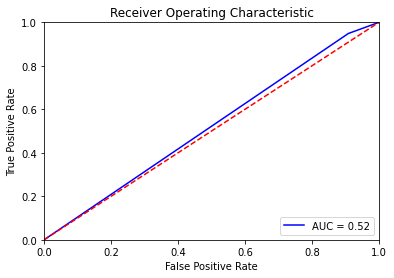

In [253]:
# Confusion matrix evaluation
print("\t\t\tModel Evaluation for scenario 1 (All data Present)\n")
print("confusion matrix\n",conf_mat)
print("\n\nAccuracy :",accuracy_)
print("\n\nClassification_Report: \n\n" ,c_report_)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [254]:
# Applying KS statistic
y_pred=[1 if x >0.838421 else 0 for x in y_probabilites[:, 1]]

In [255]:
conf_mat=confusion_matrix(y_test, y_pred)
accuracy_=accuracy_score(y_test, y_pred)
c_report_=classification_report(y_test,y_pred)
fpr, tpr, threshold=roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
auc_gender=auc(sorted(y_test),sorted(y_pred))

			Model Evaluation for scenario 1 (All data Present) KS STATISTIC

confusion matrix
 [[ 36593  16531]
 [110711  55296]]


Accuracy : 0.41933364060767303


Classification_Report: 

               precision    recall  f1-score   support

           0       0.25      0.69      0.37     53124
           1       0.77      0.33      0.46    166007

    accuracy                           0.42    219131
   macro avg       0.51      0.51      0.42    219131
weighted avg       0.64      0.42      0.44    219131



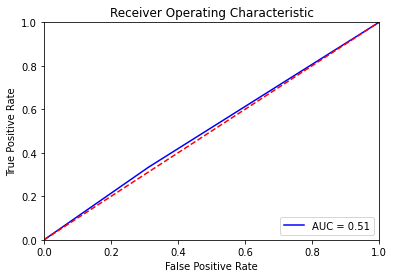

In [256]:
# Printing all the evaluation metrics
print("\t\t\tModel Evaluation for scenario 1 (All data Present) KS STATISTIC\n")
print("confusion matrix\n",conf_mat)
print("\n\nAccuracy :",accuracy_)
print("\n\nClassification_Report: \n\n" ,c_report_)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Predicting Age Scenario 1

### We will be using multiclass classification for Age because the linear regression is predicting in decimals but we can't have age in points for the output campaings.

In [2]:
final_df = pd.read_csv("final_dff.csv")
final_df.columns

Index(['device_id', 'gender', 'cluster_id', 'phone_brand', 'train_test_flag',
       'label_id', 'age_group', 'total_events', 'longitude_median',
       'latitude_median', 'week_day', 'hour', 'final_category',
       'category_code', 'phone_brands_code'],
      dtype='object')

In [3]:
#Converting categorial columns to dummy variables
categorical_columns = ['week_day','hour','category_code','phone_brands_code']
pd.get_dummies(data=final_df, columns=categorical_columns, drop_first=True).columns

Index(['device_id', 'gender', 'cluster_id', 'phone_brand', 'train_test_flag',
       'label_id', 'age_group', 'total_events', 'longitude_median',
       'latitude_median', 'final_category', 'week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'category_code_1', 'category_code_2',
       'category_code_3', 'category_code_4', 'category_code_5',
       'category_code_6', 'category_code_7', 'category_code_8',
       'category_code_9', 'category_code_10', 'phone_brands_code_1',
       'phone_brands_code_2', 'phone_brands_code_3', 'phone_brands_code_4',
       'phone_brands_code_5', 'phone_brands_code_6', 'phone_brands_code_7',
       'phone_brands_code_8', 'phone_brands_code_9', 'phone_

In [4]:
final_df=pd.get_dummies(data=final_df, columns=categorical_columns, drop_first=True)

In [5]:
df_train=final_df[final_df["train_test_flag"]=="train"]
df_test=final_df[final_df["train_test_flag"]=="test"]

In [6]:
y_train=final_df["age_group"]
y_test=final_df["age_group"]

In [7]:
y_train.value_counts()

32+      393320
25-32    343276
0-24     125768
Name: age_group, dtype: int64

In [8]:
y_test.value_counts()

32+      393320
25-32    343276
0-24     125768
Name: age_group, dtype: int64

In [9]:
df_train.columns

Index(['device_id', 'gender', 'cluster_id', 'phone_brand', 'train_test_flag',
       'label_id', 'age_group', 'total_events', 'longitude_median',
       'latitude_median', 'final_category', 'week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'category_code_1', 'category_code_2',
       'category_code_3', 'category_code_4', 'category_code_5',
       'category_code_6', 'category_code_7', 'category_code_8',
       'category_code_9', 'category_code_10', 'phone_brands_code_1',
       'phone_brands_code_2', 'phone_brands_code_3', 'phone_brands_code_4',
       'phone_brands_code_5', 'phone_brands_code_6', 'phone_brands_code_7',
       'phone_brands_code_8', 'phone_brands_code_9', 'phone_

In [10]:
x_train=final_df.drop(columns=["gender","age_group","final_category","train_test_flag","device_id","phone_brand"])
x_test=final_df.drop(columns=["gender","age_group","final_category","train_test_flag","device_id","phone_brand"])

In [11]:
x_train.head()

,cluster_id,label_id,total_events,longitude_median,latitude_median,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,...,phone_brands_code_29,phone_brands_code_30,phone_brands_code_31,phone_brands_code_32,phone_brands_code_33,phone_brands_code_34,phone_brands_code_35,phone_brands_code_36,phone_brands_code_37,phone_brands_code_38
0,1.0,548.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,262.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,251.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1008.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,786.0,303,30.65,104.08,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler
x_train["total_events"]=StandardScaler().fit_transform(x_train[["total_events"]])

In [13]:
x_train["longitude_median"]=StandardScaler().fit_transform(x_train[["longitude_median"]])
x_train["latitude_median"]=StandardScaler().fit_transform(x_train[["latitude_median"]])

In [14]:
x_test["total_events"]=StandardScaler().fit_transform(x_test[["total_events"]])
x_test["longitude_median"]=StandardScaler().fit_transform(x_test[["longitude_median"]])
x_test["latitude_median"]=StandardScaler().fit_transform(x_test[["latitude_median"]])

In [15]:
x_train

,cluster_id,label_id,total_events,longitude_median,latitude_median,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,...,phone_brands_code_29,phone_brands_code_30,phone_brands_code_31,phone_brands_code_32,phone_brands_code_33,phone_brands_code_34,phone_brands_code_35,phone_brands_code_36,phone_brands_code_37,phone_brands_code_38
0,1.0,548.0,-0.009729,0.034592,-0.272229,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,262.0,-0.009729,0.034592,-0.272229,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,251.0,-0.009729,0.034592,-0.272229,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,1008.0,-0.009729,0.034592,-0.272229,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,786.0,-0.009729,0.034592,-0.272229,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862359,1.0,235.0,-0.755984,1.145120,0.256304,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862360,1.0,129.0,-0.755984,1.145120,0.256304,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862361,1.0,548.0,-0.755984,1.145120,0.256304,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862362,1.0,168.0,-0.755984,1.145120,0.256304,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
len(x_train.columns)

82

In [17]:
len(x_test.columns)

82

In [18]:
x_train.columns

Index(['cluster_id', 'label_id', 'total_events', 'longitude_median',
       'latitude_median', 'week_day_1', 'week_day_2', 'week_day_3',
       'week_day_4', 'week_day_5', 'week_day_6', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'category_code_1', 'category_code_2', 'category_code_3',
       'category_code_4', 'category_code_5', 'category_code_6',
       'category_code_7', 'category_code_8', 'category_code_9',
       'category_code_10', 'phone_brands_code_1', 'phone_brands_code_2',
       'phone_brands_code_3', 'phone_brands_code_4', 'phone_brands_code_5',
       'phone_brands_code_6', 'phone_brands_code_7', 'phone_brands_code_8',
       'phone_brands_code_9', 'phone_brands_code_10', 'phone_brands_code_11',
       'phone_brands_code_12', 'phone_brands_code_13',

### Hyperparameter tuning

In [21]:
logic1 = LogisticRegression(multi_class="multinomial")
logic2 = RandomForestClassifier(random_state=4)
xgb = XGBClassifier()

stacking_Classifier = StackingCVClassifier(classifiers=[logic1, logic2], meta_classifier=xgb, use_probas=True, cv=3)

In [22]:
for clf, label in zip([logic1, logic2, stacking_Classifier], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x_train.values, y_train.values, cv=4, scoring='roc_auc_ovr')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.50 (+/- 0.00) [lr]
Accuracy: 0.50 (+/- 0.00) [Random Forest]
[04:47:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:59:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:11:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:24:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' 

In [29]:
# Parameters for XGboost
params = {
          'randomforestclassifier__max_depth': [2,5,10],
          'randomforestclassifier__n_estimators': [5,10,20]
         }

In [30]:
grid = GridSearchCV(estimator=stacking_Classifier, 
                    param_grid=params, 
                    cv=5,
                    refit=True)

In [31]:
grid.fit(x_train.values,y_train.values)

[05:29:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:32:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:35:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:38:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

GridSearchCV(cv=5,
             estimator=StackingCVClassifier(classifiers=[LogisticRegression(multi_class='multinomial'),
                                                         RandomForestClassifier(random_state=4)],
                                            cv=3,
                                            meta_classifier=XGBClassifier(base_score=None,
                                                                          booster=None,
                                                                          colsample_bylevel=None,
                                                                          colsample_bynode=None,
                                                                          colsample_bytree=None,
                                                                          enable_categorical=False,
                                                                          gamma=None,
                                                                        

In [32]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

In [33]:
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

0.454 +/- 0.00 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 5}
0.453 +/- 0.00 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 10}
0.453 +/- 0.00 {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 20}
0.453 +/- 0.00 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 5}
0.453 +/- 0.00 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 10}
0.454 +/- 0.00 {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 20}
0.453 +/- 0.00 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 5}
0.453 +/- 0.00 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 10}
0.454 +/- 0.00 {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 20}


In [34]:
stacking_age_class=stacking_Classifier.fit(x_train.values,y_train.values)

[08:07:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Best model estimator

In [35]:
best_model_ageclass=grid.best_estimator_

In [36]:
# Saving the model as pickle file 
import pickle
filename = 'age_pred.sav'
pickle.dump(best_model_ageclass, open(filename, 'wb'))

In [37]:
# Uploading the model in s3 bucket and jupyter notebook
!aws s3 cp age_pred.sav s3://s3accessec2/final_submission/age_pred.sav .


Unknown options: .


In [40]:
y_pred=best_model_ageclass.predict(x_test.values)

In [41]:
y_pred

array(['32+', '32+', '32+', ..., '32+', '32+', '32+'], dtype=object)

In [42]:
y_probabilites=best_model_ageclass.predict_proba(x_test)

### Model evaluation

In [44]:
y_probabilites[:, 1]

array([0.38966367, 0.38792554, 0.3977278 , ..., 0.39272413, 0.39129588,
       0.39272413], dtype=float32)

In [55]:
# Since it is a multiclass classification problem, we will not be using the roc_auc curve
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc
conf_mat=confusion_matrix(y_test, y_pred)
accuracy_=accuracy_score(y_test, y_pred)
c_report_=classification_report(y_test,y_pred)
#fpr, tpr, threshold=roc_curve(y_test,y_pred)
#roc_auc = auc(fpr, tpr)

In [57]:
# Confusion matrix evaluation
print("\t\t\tModel Evaluation for scenario 1 (All data Present)\n")
print("confusion matrix\n",conf_mat)
print("\n\nAccuracy :",accuracy_)
print("\n\nClassification_Report: \n\n" ,c_report_)
'''plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()'''


			Model Evaluation for scenario 1 (All data Present)

confusion matrix
 [[    24   4328 121416]
 [    62  11888 331326]
 [    88  13496 379736]]


Accuracy : 0.45415624956514883


Classification_Report: 

               precision    recall  f1-score   support

        0-24       0.14      0.00      0.00    125768
       25-32       0.40      0.03      0.06    343276
         32+       0.46      0.97      0.62    393320

    accuracy                           0.45    862364
   macro avg       0.33      0.33      0.23    862364
weighted avg       0.39      0.45      0.31    862364



"plt.title('Receiver Operating Characteristic')\nplt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)\nplt.legend(loc = 'lower right')\nplt.plot([0, 1], [0, 1],'r--')\nplt.xlim([0, 1])\nplt.ylim([0, 1])\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\nplt.show()"